In [1]:
from datetime import datetime 
import pandas as pd
from global_map import global_map
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
import numpy as np
import sys
import os
import glob
import warnings
import matplotlib as mpl
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
import cartopy as crt
sys.path.append("..")
from path_dict import path_dict


# PLOTTING inputs
cmap = mpl.colormaps['viridis'].resampled(20)
cmap2 = mpl.colormaps['hot_r']#.resampled(20)
cmap3 = mpl.colormaps['magma_r'].resampled(20)
cmap4 = mpl.colormaps['seismic']#.resampled(20)

In [2]:
# locate timeseries 
dir_data = '/gpfs/work1/0/einf3499/06_model_runs'
dir_wl_new = os.path.join(dir_data,'02_slr_tide_surge_runs','model_input_ERA5_2021')
dir_wl_old = os.path.join(dir_data,'02_slr_tide_surge_runs','model_input_ERA5_2021_old')

In [3]:
# station ids
#stations_gtsm = (39598,"IJmuiden") 
stations_gtsm = (18227,"CrossRiver") 

In [4]:
def read_his_file(path):
    ds = xr.open_dataset(path)
    ds = ds.assign_coords({'stations': ds.stations})
    keys = list(ds.keys()) # remove all variables except water level
    if 'waterlevel' in keys:
        keys.remove('waterlevel')
    if 'patm' in keys:
        keys.remove('patm')
    ds = ds.drop(keys)
    return ds

In [6]:
# Open model data
ds_wl_new = read_his_file(os.path.join(dir_wl_new,'output','gtsm_fine_0000_his.nc'))
ds_wl_old = read_his_file(os.path.join(dir_wl_old,'output','gtsm_fine_0000_his.nc'))

In [17]:
#wl_mean_new = ds_wl_new.sel(time=slice('1978-01-01','1978-01-20'))['waterlevel'].mean(dim='time')
#wl_mean_old = ds_wl_old.sel(time=slice('1978-01-01','1978-01-20'))['waterlevel'].mean(dim='time')

In [9]:
ds_wl_old

<xarray.Dataset>
Dimensions:               (stations: 43734, time: 55009)
Coordinates:
    station_x_coordinate  (stations) float64 ...
    station_y_coordinate  (stations) float64 ...
    station_name          (stations) |S256 ...
  * time                  (time) datetime64[ns] 2020-12-15 ... 2022-01-01
  * stations              (stations) int64 0 1 2 3 4 ... 43730 43731 43732 43733
Data variables:
    waterlevel            (time, stations) float64 ...
Attributes:
    institution:    Deltares
    references:     http://www.deltares.nl
    source:         Deltares, D-Flow FM Version 1.2.149.141346, Jun 08 2022, ...
    history:        Created on 2022-09-27T22:04:48+0200, D-Flow FM
    date_created:   2022-09-27T22:04:48+0200
    date_modified:  2022-09-27T22:04:48+0200
    Conventions:    CF-1.5 Deltares-0.1
    standard_name:  northward_sea_water_velocity
    long_name:      flow element center velocity vector, y-component
    units:          m s-1
    geometry:       station_geom
    _FillValue:     -999.0

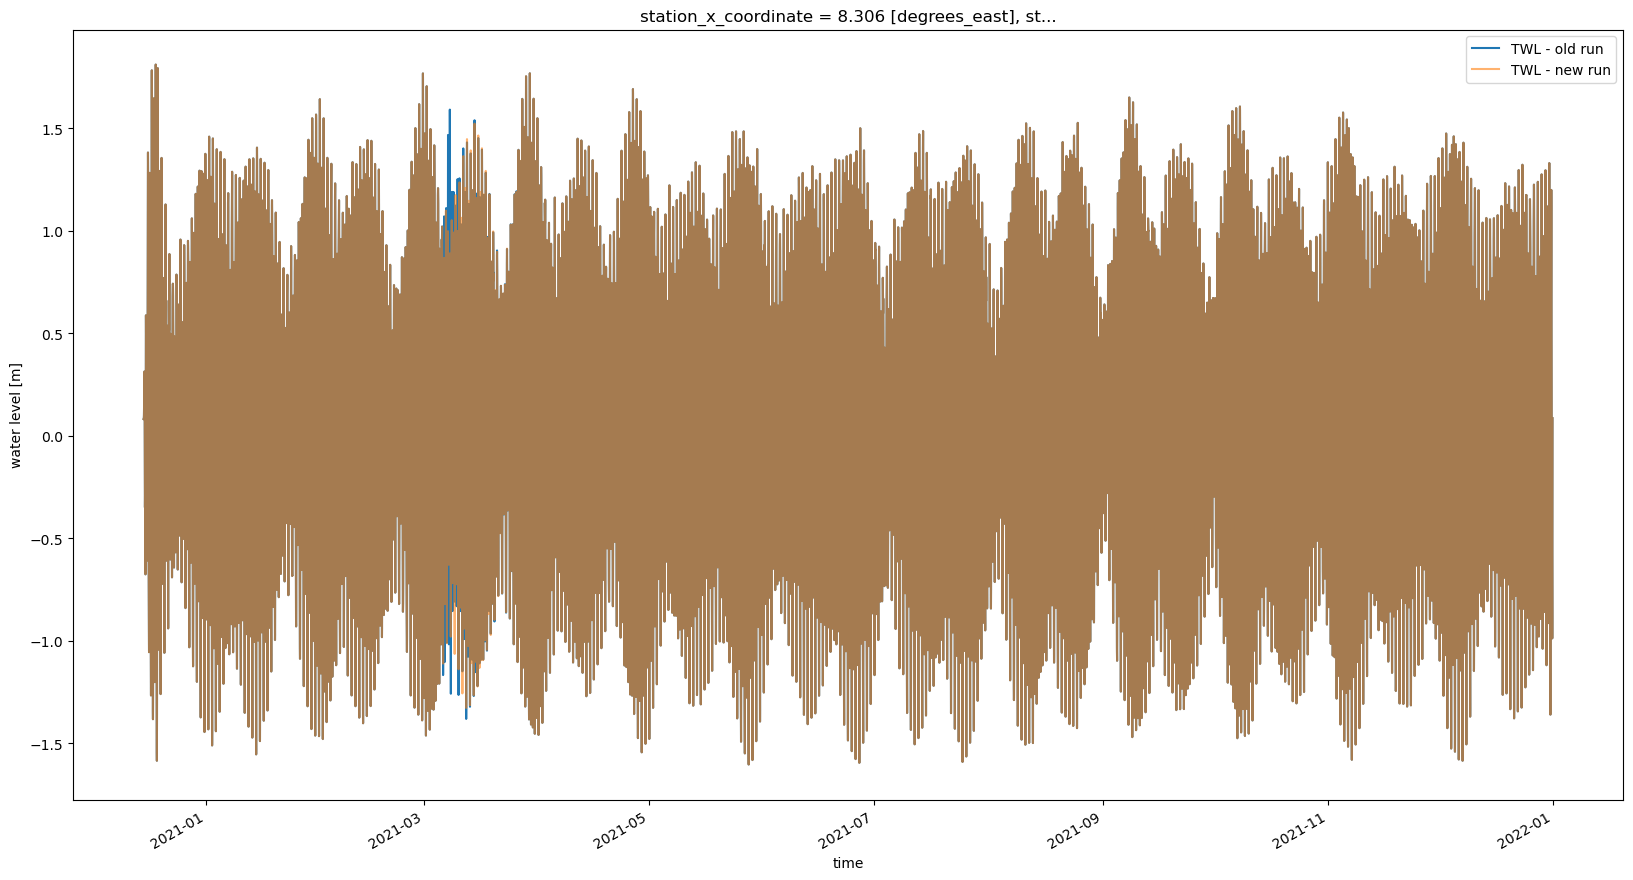

In [23]:
fig,ax = plt.subplots(figsize=(20,10))
ds_wl_old['waterlevel'].sel(stations=stations_gtsm[0]).plot(ax=ax, label='TWL - old run')
ds_wl_new['waterlevel'].sel(stations=stations_gtsm[0]).plot(ax=ax, label='TWL - new run', alpha=0.6)
ax.legend()

In [13]:
ds_ts_tide = xr.open_dataset(os.path.join('/projects/0/einf3499/03_tides_CDS/','future_tide_2021_03_v1.nc'))

In [15]:
ds_surge_new = ds_wl_new['waterlevel'].sel(time=slice('2021-03-01','2021-03-31'), stations=stations_gtsm[0]) - ds_ts_tide['tide'].sel(time=slice('2021-03-01','2021-03-31'), stations=stations_gtsm[0])

In [17]:
ds_surge_old = ds_wl_old['waterlevel'].sel(time=slice('2021-03-01','2021-03-31'), stations=stations_gtsm[0]) - ds_ts_tide['tide'].sel(time=slice('2021-03-01','2021-03-31'), stations=stations_gtsm[0])

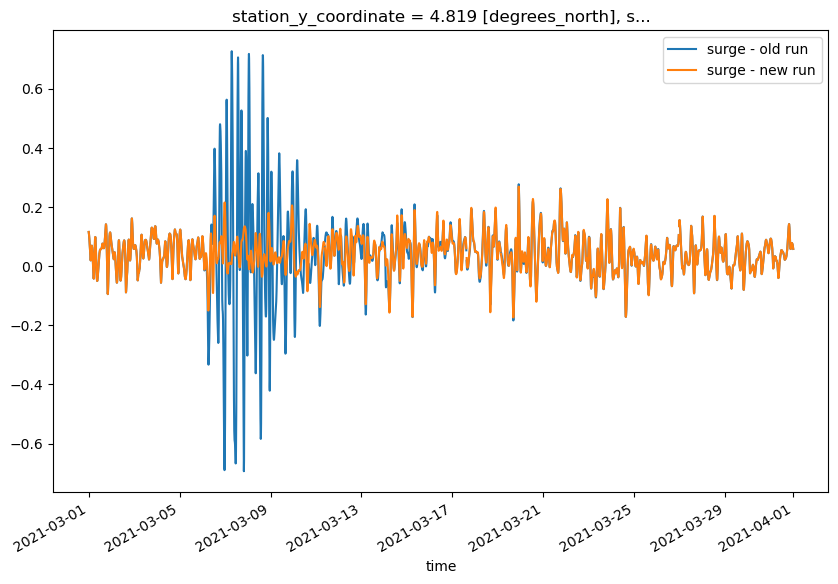

In [21]:
fig,ax = plt.subplots(figsize=(10,6))
ds_surge_old.plot(ax=ax, label='surge - old run')
ds_surge_new.plot(ax=ax, label='surge - new run')
ax.legend()

In [24]:
tmp = xr.open_dataset(os.path.join(r'/gpfs/work1/0/einf3499/06_model_runs/03_postprocessing/timeseries-GTSM-ERA5-hourly/surge','reanalysis_surge_hourly_2021_03_v1.nc'))

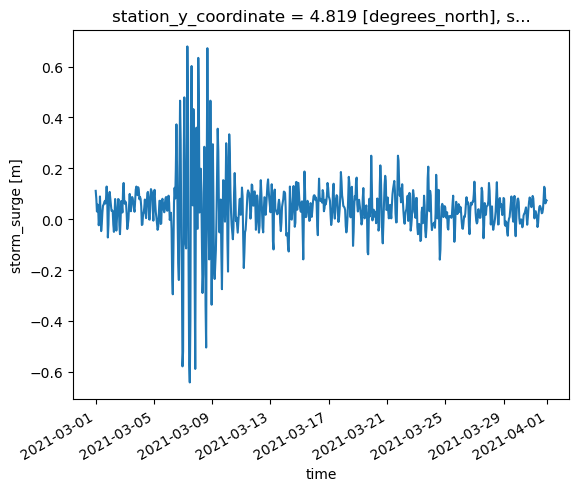

In [26]:
tmp['surge'].sel(time=slice('2021-03-01','2021-03-31'), stations=stations_gtsm[0]).plot()